In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels

## 1. Getting to know the data

In [2]:
# Data from https://datahub.io/core/global-temp

df = pd.read_csv('../data/monthly_csv.csv')
df['Date'] = pd.to_datetime(df['Date'])
df[df['Date'] < pd.to_datetime('1880-06-01')].head(10)

,Source,Date,Mean
3278,GCAG,1880-05-06,-0.0738
3279,GISTEMP,1880-05-06,-0.1400
3280,GCAG,1880-04-06,-0.0499
3281,GISTEMP,1880-04-06,-0.2700
3282,GCAG,1880-03-06,-0.1357
3283,GISTEMP,1880-03-06,-0.1800
3284,GCAG,1880-02-06,-0.1229
3285,GISTEMP,1880-02-06,-0.2100
3286,GCAG,1880-01-06,0.0009
3287,GISTEMP,1880-01-06,-0.3000


In [3]:
temps = df.pivot(index='Date', columns='Source', values='Mean')
#temps.info()
#temps.head()

In [4]:
from numpy import polyfit

def fit(X, y, degree=3):
    coef = polyfit(X, y, degree)
    trendpoly = np.poly1d(coef)
    return trendpoly(X)

def get_season(s, yearly_periods=4, degree=3):
    X = [i%(365/4) for i in range(0, len(s))]
    seasonal = fit(X, s.values, degree)
    return pd.Series(data=seasonal, index=s.index)

def get_trends(s, degree=3):
    X = list(range(len(s)))
    trend = fit(X, s.values, degree)
    return pd.Series(data=trend, index=s.index)

temps['trend'] = get_trends(temps['GCAG'])
temps['season'] = get_season(temps['GCAG'] - temps['trend'])

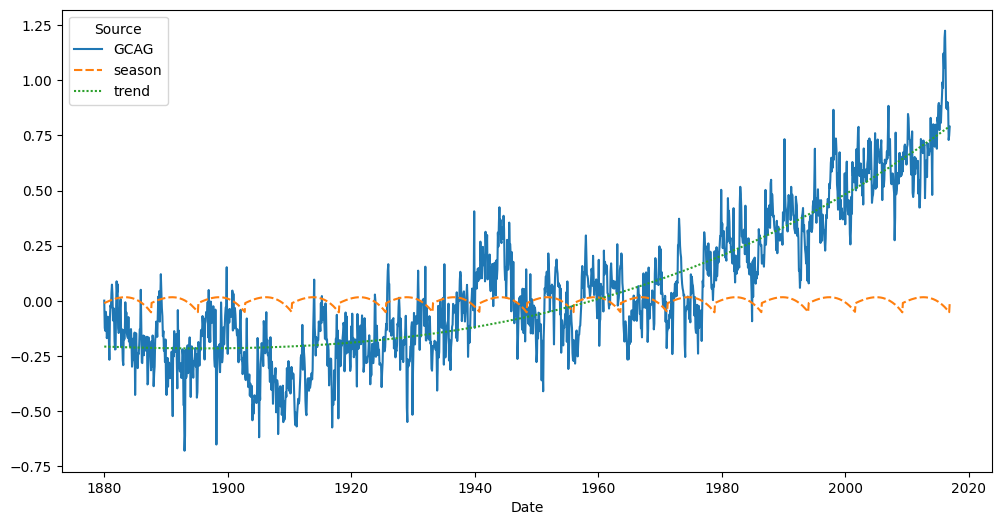

In [5]:
fig,ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=temps[['GCAG','season','trend']])
plt.show()